# Task 1: Image processing (Estimated time: 15 min)
 - You are provided with 3 images of an agrivero table photographed in a lightbox. 
 - Please write code that segments the table without the wooden border. 
 - The resulting segmentation mask should be written out as "<filename>_mask.jpg". Result to hand in: 1 python file

In [7]:
import cv2 as cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [8]:
def show_img(name, img):
    plt.subplot(1,1,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(name, fontSize =16, color="b")
    plt.show()

In [195]:
def masking(dir_name):
    '''
    this function is supposed to run and get masked img, but there is a bug, i could not fixed it. 
    '''
    dir = os.path.dirname(os.path.abspath(dir_name))
    input = os.path.join(dir, dir_name)
    for img_name in os.listdir(input):
        img = cv.imread(os.path.join(input +"/"+ img_name))
        img_h, img_w,_ = img.shape
        blurred = cv2.GaussianBlur(img, (5, 5), 0)
        hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, lower, upper)
        mask = cv2.erode(mask, None, iterations=2)
        mask = cv2.dilate(mask, None, iterations=2)
        contours, _hierarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        max_i = 0
        for i,cnt in enumerate(contours):
            if cv2.contourArea(cnt) > cv2.contourArea(contours[max_i]):
                max_i = i
                peri = cv2.arcLength(contours[max_i], True)
                approx = cv2.approxPolyDP(contours[max_i], 0.02 * peri, True)
                pts_o = np.float32([approx[0][0], approx[1][0],  approx[2][0], approx[3][0]])
                pts_d = np.float32([[img_w, 0], [0, 0], [0, img_h], [img_w, img_h]])
                M = cv2.getPerspectiveTransform(pts_o, pts_d)
                dst = cv2.warpPerspective(img, M, (img_w, img_h))    
                show_img("src", img)
                show_img("dst", dst)
                #cv.imwrite("1_mask.jpg",dst)

### To be get the result, we need to run the following code 3 times. 
   - step 1: change name/number of the path to 'img/01.jpg' 
     - img = cv2.imread("img/01.jpg")
   - step 2: change saving name of the mask at last line of the code: 1_mask.jpg.         
     - cv.imwrite("1_mask.jpg",dst)

In [9]:
img = cv2.imread("img/01.jpg")
img_h, img_w, _ = img.shape

In [10]:
blurred = cv2.GaussianBlur(img, (5, 5), 0)
hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
lower = (35, 0, 0)
upper = (120, 255, 255)

In [11]:
mask = cv2.inRange(hsv, lower, upper)

mask = cv2.erode(mask, None, iterations=2)

mask = cv2.dilate(mask, None, iterations=2)

contours, _hierarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

max_i = 0
for i,cnt in enumerate(contours):
    if cv2.contourArea(cnt) > cv2.contourArea(contours[max_i]):
        max_i = i

peri = cv2.arcLength(contours[max_i], True)
approx = cv2.approxPolyDP(contours[max_i], 0.02 * peri, True)

<ipython-input-8-108144fbb7c8>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title(name, fontSize =16, color="b")


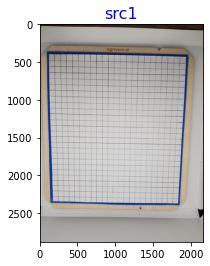

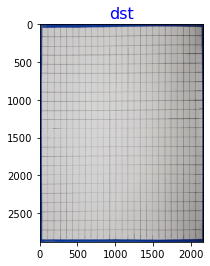

NameError: name 'cv' is not defined

In [12]:
pts_o = np.float32([approx[0][0], approx[1][0],  approx[2][0], approx[3][0]])
pts_d = np.float32([[img_w, 0], [0, 0], [0, img_h], [img_w, img_h]])
M = cv2.getPerspectiveTransform(pts_o, pts_d)
dst = cv2.warpPerspective(img, M, (img_w, img_h))    
show_img("src1", img)
show_img("dst", dst)
cv2.imwrite("1_mask.jpg",dst)